# Topics

## Decade

### 1861-1870:
+ 0,"satan, devil, cain, darkness, spiritualism, serpent"
+ 4,"religion, crime, peace, country, religious, society"
+ 9,"sanctuary, resurrection, verse, wicked, judgment, text"
+ 12,"rome, pope, france, country, europe, government"
+ 13,"gospel, sinner, obedience, principle, justice, paul"
+ 17,"beast, nation, wrath, judgment, wicked, plague"
+ 19,"prophecy, event, daniel, paul, period, verse"
+ 22,"sunday, argument, doctrine, position, institution, claim"
+ 23,"tract, cloth, exposition, prophecy, chart, showing"

health/character
+ 2,"salt, action, substance, animal, element, milk"
+ 7,"tobacco, habit, country, effect, disease, force"
+ 11,"food, meal, eating, meat, bread, flesh"
+ 14,"disease, bath, fever, treatment, cold, patient"
+ 24,"dress, disease, physician, woman, drug, patient"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import GoH.modeldata
import GoH.modelviz
import GoH.utilities
import gspread
import matplotlib
import matplotlib.ticker as ticker
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/jeriwieringa/Dissertation/drafts/code/secrets/dissertation-881847769b13.json', scope)

gc = gspread.authorize(credentials)

In [4]:
colors = ['#4e79a7', '#f28e2b', '#b07aa1']

In [5]:
def create_piechart(df, topic_id, colors):
    return df.groupby('match?')['doc_id'].agg(pd.Series.nunique).plot(kind='pie', 
                                                             colors=colors, 
                                                             shadow=True, 
                                                             startangle=90, 
                                                             autopct='%.2f%%',
                                                             title='Percentage of Top 30 Docs from \n Decade Model 1861-1870 \n that "Match" Topic {}'.format(topic_id)
                                                            )

In [6]:
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [7]:
base_dir = "/Users/jeriwieringa/Dissertation/drafts/data/module-3/"
model_scheme = "decade"
period = "1861-to-1870"

In [8]:
labels = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_topicLabels.csv'.format(model_scheme, period)))

In [9]:
# Topics to filter by
topics = [0,4,9,12,13,17,19,22,23,2,7,11,14,24]

In [10]:
df = GoH.modeldata.model_to_df(base_dir, model_scheme, period )

## Time Series

In [11]:
time_series = GoH.modeldata.topic_series(df, ['year', 'topic_id'], labels)

In [12]:
ts = time_series[time_series['topic_id'].isin(topics)]

In [13]:
ts = ts.pivot('year', 'topic_words', 'normalized_weight')

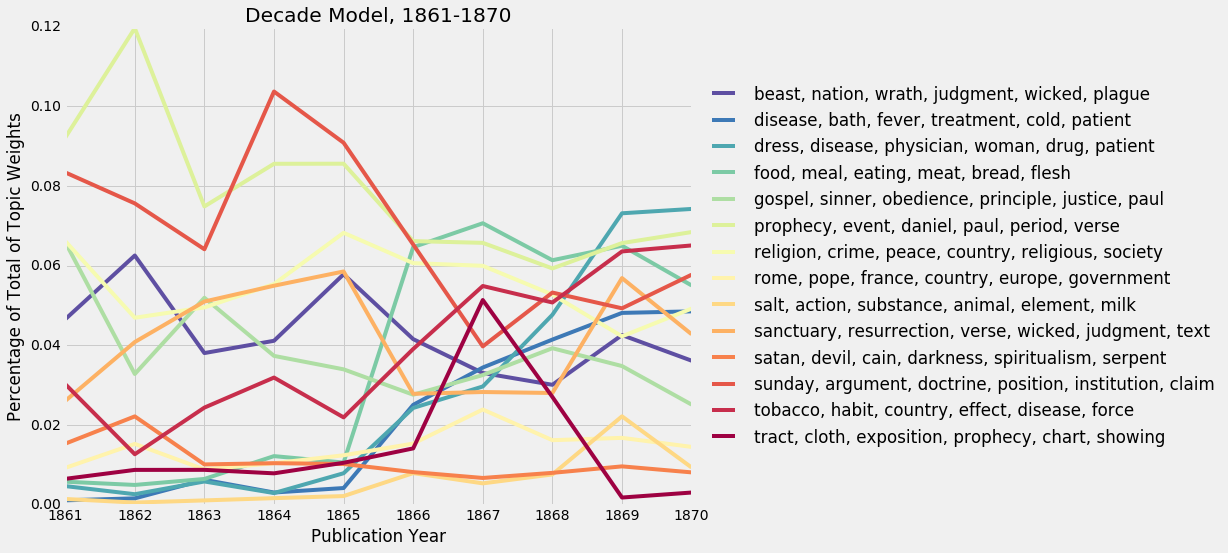

In [14]:
matplotlib.pyplot.figure()
ax = ts.plot(figsize=(10,8), colormap='Spectral_r', title='Decade Model, 1861-1870')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.set_xlabel("Publication Year")
ax.set_ylabel("Percentage of Total of Topic Weights")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Review Docs

In [15]:
wtm = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_wtm.csv'.format(model_scheme, period)))

In [16]:
dts = gc.open('EvaluateCorpus')
worksheet = dts.get_worksheet(3)

scores = pd.DataFrame(worksheet.get_all_records())

### 19,"prophecy, event, daniel, paul, period, verse"

Hypothesis: Discussions of prophecies and their interpretation

In [17]:
t19 = wtm[wtm['topic_id'] == 19]

In [18]:
print(', '.join(t19['token'].tolist()))

prophecy, event, daniel, paul, period, verse, vision, apostle, prophet, king, history, gospel, chapter, language, disciple, sign, understand, doctrine, evidence, known


In [19]:
# GoH.modeldata.evaluate_topic_docs(df, 19)

In [20]:
df19 = scores[scores['topic'] == 19]

In [21]:
df19

,description,doc_id,match?,topic
1,interpretation of Revelations 10,RH18621021-V20-21-page4.txt,yes,19
2,more interpretation of Daniel; question of whe...,RH18641206-V25-02-page4.txt,yes,19
3,interpretaton of Daniel and the 2300 days and ...,RH18630721-V22-08-page4.txt,yes,19
4,millennial beliefs of seventh-century English ...,RH18621007-V20-19-page3.txt,yes,19
5,discussion of the 1335 days,RH18660227-V27-13-page4.txt,yes,19
6,distinguising the SDA position (which held tha...,RH18631229-V23-05-page4.txt,yes,19
7,interest in early christian faith; Origen as t...,RH18620930-V20-18-page2.txt,yes,19
8,evidence of the truth of Christianity,RH18620204-V19-10-page3.txt,yes,19
9,Thoughts on the book of Daniel; claim that Pau...,RH18700809-V36-08-page4.txt,yes,19
10,explication of Daniel explaining SDA beliefs,RH18700222-V35-10-page1.txt,yes,19


Conclusion: Arguments for SDA beliefs and Interpretation of Scripture

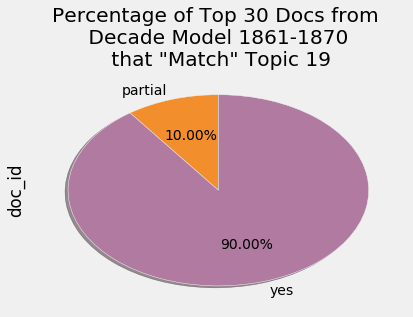

In [22]:
create_piechart(df19, 19, colors[1:])

### 22,"sunday, argument, doctrine, position, institution, claim"

In [23]:
t22 = wtm[wtm['topic_id'] == 22]

In [24]:
print(', '.join(t22['token'].tolist()))

sunday, argument, doctrine, position, institution, claim, error, change, adventist, observance, prove, statement, theory, keeping, principle, idea, authority, evidence, reply, vision


Hypothesis: Arguments in favor of Saturday Sabbath

In [25]:
# GoH.modeldata.evaluate_topic_docs(df, 22)

In [26]:
df22 = scores[scores['topic'] == 22]

In [27]:
df22

,description,doc_id,match?,topic
32,response to tract that gives 50 arguments agai...,RH18620114-V19-07-page4.txt,yes,22
33,more arguments with Himes about sabbath keeping,RH18640301-V24-14-page4.txt,yes,22
34,more arguments with Himes about sabbath keeping,RH18640322-V24-17-page4.txt,yes,22
35,arguments against arguments for sunday sabbath,RH18671008-V30-17-page9.txt,yes,22
36,ongoing argument between Cornell and Preble on...,RH18651226-V27-04-page4.txt,yes,22
37,Argument against arguments for sunday sabbath,RH18650404-V25-18-page2.txt,yes,22
38,response to critique of History of the Sabbath...,RH18650117-V25-08-page4.txt,yes,22
39,ongoing argument with Himes about sunday vs sa...,RH18640517-V24-25-page4.txt,yes,22
40,"more arguing against piece by Preble, mostly a...","RH18700215-V35-08,09-page6.txt",yes,22
41,baptism by immersion; error of sunday-keeping;...,RH18650926-V26-17-page4.txt,yes,22


Conclusion: Defenses of Seventh-day Adventism, particularly on the Sabbath

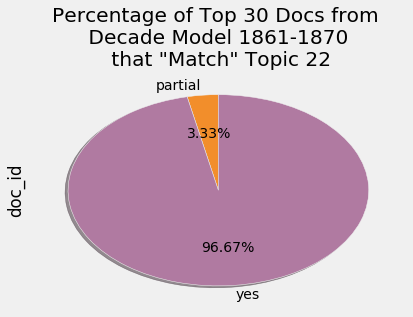

In [28]:
create_piechart(df22, 22, colors[1:])

### 4,"religion, crime, peace, country, religious, society"

In [29]:
t4 = wtm[wtm['topic_id'] == 4]

In [30]:
print(', '.join(t4['token'].tolist()))

religion, crime, peace, country, religious, society, money, character, conscience, influence, public, moment, pleasure, christianity, virtue, murder, pulpit, court, lost, political


Hypothesis: Signs of the coming end, particularly failures of the churches.

In [31]:
# GoH.modeldata.evaluate_topic_docs(df, 4)

In [32]:
df4 = scores[scores['topic'] == 4]

In [33]:
df4

,description,doc_id,match?,topic
63,pontius pilate in Vienne -- tale of the fate o...,RH18610716-V18-07-page2.txt,partial,4
64,cedar as metaphor for growth of christian (slo...,RH18610507-V17-25-page3.txt,yes,4
65,reprint of letter from Lydia Marie Child with ...,RH18620923-V20-17-page3.txt,yes,4
66,tale of a reformed distiller; dangers of absenthe,HR18690201-V03-08-page17.txt,partial,4
67,rise of hygeio-therapy leading to healthy happ...,HR18681201-V03-06-page12.txt,yes,4
68,popular religion on slavery in the US; warning...,RH18610219-V17-14-page3.txt,yes,4
69,European unrest; local unrest of civil war; im...,RH18621230-V21-05-page2.txt,yes,4
70,importance of moral behavior in small and larg...,RH18620513-V19-24-page7.txt,yes,4
71,national sin of profanity; value of early conv...,RH18621209-V21-02-page3.txt,yes,4
72,morality (or lack there of) of New York; criti...,RH18680630-V32-02-page7.txt,yes,4


Conclusion: Signs of the Times, particularly war; Development of or Lack of Christian Character

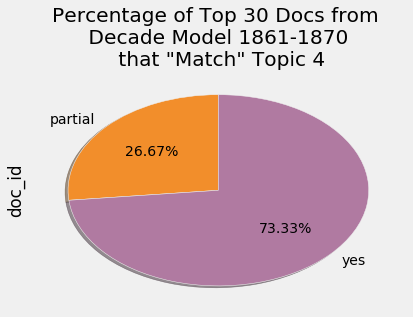

In [34]:
create_piechart(df4, 4, colors[1:])

### 11,"food, meal, eating, meat, bread, flesh"

In [35]:
t11 = wtm[wtm['topic_id'] == 11]

In [36]:
print(', '.join(t11['token'].tolist()))

food, meal, eating, meat, bread, flesh, animal, fruit, diet, stomach, appetite, sugar, drink, vegetable, flour, wheat, reform, wine, disease, habit


Hypothesis: Discussion of the dietary causes of diseases and the virtues of Health Reform.

In [37]:
# GoH.modeldata.evaluate_topic_docs(df, 11)

In [38]:
df11 = scores[scores['topic'] == 11]

In [39]:
df11

,description,doc_id,match?,topic
94,"importance of washing grain, use of freshly gr...",HR18671001-V02-04-page2.txt,yes,11
95,two meals system for children should be attempted,HR18680101-V02-07-page13.txt,yes,11
96,problem of diseased potatoes; need to improve ...,HR18700601-V04-12-page14.txt,yes,11
97,importance of eating whole-meal bread; whole g...,HR18670701-V02-01-page11.txt,yes,11
98,variety of responses to reform diet depending ...,HR18680801-V03-02-page10.txt,yes,11
99,standard of good bread is made with brown or G...,"HR18670601-V01-11,12-page4.txt",yes,11
100,flour with the bran more nutritious and cheape...,HR18670801-V02-02-page6.txt,yes,11
101,arguments for health reform diet: fully nutrit...,HR18660901-V01-02-page10.txt,yes,11
102,arguments for two meal system: labor and time ...,HR18680601-V02-12-page4.txt,yes,11
103,case against sugar (but not against fresh frui...,HR18680801-V03-02-page8.txt,yes,11


Conclusion: The Health Reform Diet

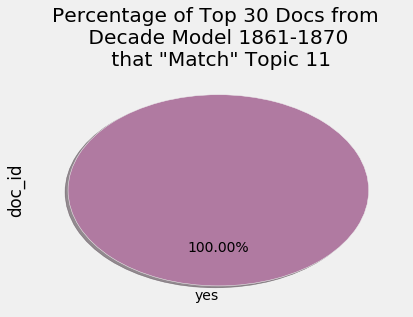

In [40]:
create_piechart(df11, 11, colors[2:])